<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/chronic_kidney_diseases_prediction_updated_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)


In [248]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [249]:
!kaggle datasets download -d mansoordaku/ckdisease

ckdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [250]:
import zipfile
zip = zipfile.ZipFile("/content/ckdisease.zip",'r')
zip.extractall("/content")
zip.close()

In [251]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [252]:
df=pd.read_csv('kidney_disease.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [253]:
df.shape

(400, 25)

In [254]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [255]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [256]:
df.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
389,41.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,112.0,48.0,0.7,140.0,5.0,17.0,52,7200,5.8,no,no,no,good,no,no,notckd
237,80.0,70.0,1.015,2.0,2.0,NaN,normal,notpresent,notpresent,141.0,53.0,2.2,NaN,NaN,12.7,40,9600,NaN,yes,yes,no,poor,yes,no,ckd
65,44.0,90.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,NaN,20.0,1.1,NaN,NaN,15.0,48,NaN,NaN,no,\tno,no,good,no,no,ckd
337,44.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,92.0,40.0,0.9,141.0,4.9,14.0,52,7500,6.2,no,no,no,good,no,no,notckd
316,35.0,NaN,1.020,0.0,0.0,normal,normal,NaN,NaN,99.0,30.0,0.5,135.0,4.9,15.4,48,5000,5.2,no,no,no,good,no,no,notckd


### **Data Preparations**
1. Data Cleaning
2. Data Explorations
3. Data Splitting
4. Feature Engineering
5. Model Training
6. Model Improvements

### **1. Data Cleaning**

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [258]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [259]:
age_m=df['age'].mean()
df['age']=df['age'].fillna(age_m)

In [260]:
df['age']=df['age'].astype(int)

In [261]:
bp_mean=df['bp'].mean()
df['bp']=df['bp'].fillna(bp_mean)

In [262]:
sg_m=df['sg'].mean()
df['sg']=df['sg'].fillna(sg_m)

In [263]:
al_m=df['al'].mean()
df['al']=df['al'].fillna(al_m)

In [264]:
su_m=df['su'].mean()
df['su']=df['su'].fillna(su_m)

In [265]:
rbc_m=df['rbc'].mode()
print(rbc_m)
df['rbc']=df['rbc'].fillna('normal')

0    normal
Name: rbc, dtype: object


In [266]:
pc_m=df['pc'].mode()
print(pc_m)
df['pc']=df['pc'].fillna('normal')

0    normal
Name: pc, dtype: object


In [267]:
pcc_m=df['pcc'].mode()
print(pcc_m)
df['pcc']=df['pcc'].fillna('notpresent')

0    notpresent
Name: pcc, dtype: object


In [268]:
ba_m=df['ba'].mode()
print(ba_m)
df['ba']=df['ba'].fillna('notpresent')

0    notpresent
Name: ba, dtype: object


In [269]:
bgr_m=df['bgr'].mean()
df['bgr']=df['bgr'].fillna(bgr_m)

In [270]:
bu_m=df['bu'].mean()
df['bu']=df['bu'].fillna(bu_m)

In [271]:
sc_m=df['sc'].mean()
df['sc']=df['sc'].fillna(sc_m)

In [272]:
sod_m=df['sod'].mean()
df['sod']=df['sod'].fillna(sod_m)

In [273]:
pot_m=df['pot'].mean()
df['pot']=df['pot'].fillna(pot_m)

In [274]:
hemo_m=df['hemo'].mean()
print(hemo_m)
df['hemo']=df['hemo'].fillna(12.52)

12.526436781609195


In [275]:
pcv_m=df['pcv'].mode()
pcv_m=(int(pcv_m[0])+int(pcv_m[1]))/2
df['pcv']=df['pcv'].fillna(pcv_m)

In [276]:
wc_m=df['wc'].mode()
print(wc_m)
df['wc']=df['wc'].fillna('9800')

0    9800
Name: wc, dtype: object


In [277]:
rc_m=df['rc'].mode()
print(rc_m)
df['rc']=df['rc'].fillna('5.2')

0    5.2
Name: rc, dtype: object


In [278]:
htn_m=df['htn'].mode()
print(htn_m)
df['htn']=df['htn'].fillna('no')

0    no
Name: htn, dtype: object


In [279]:
dm_m=df['dm'].mode()
print(dm_m)
df['dm']=df['dm'].fillna('no')

0    no
Name: dm, dtype: object


In [280]:
cad_m=df['cad'].mode()
print(cad_m)
df['cad']=df['cad'].fillna('no')

0    no
Name: cad, dtype: object


In [281]:
appet_m=df['appet'].mode()
print(appet_m)
df['appet']=df['appet'].fillna('good')

0    good
Name: appet, dtype: object


In [282]:
pe_m=df['pe'].mode()
print(pe_m)
df['pe']=df['pe'].fillna('no')

0    no
Name: pe, dtype: object


In [283]:
ane_m=df['ane'].mode()
print(ane_m)
df['ane']=df['ane'].fillna('no')

0    no
Name: ane, dtype: object


In [284]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [285]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.472500,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.525600
std,16.975118,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716172
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.520000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [286]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [287]:
df['classification']=df['classification'].str.replace('ckd\t','ckd')

In [288]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [289]:
unique_cat=[]
for i,v in enumerate(df.columns):
    if df[v].dtype == 'object':
        unique_cat.append(f"{v}:- {df[v].unique()}")

In [290]:
unique_cat

["rbc:- ['normal' 'abnormal']",
 "pc:- ['normal' 'abnormal']",
 "pcc:- ['notpresent' 'present']",
 "ba:- ['notpresent' 'present']",
 "pcv:- ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' 46.5 '16' '24' '37'\n '30' '34' '40' '45' '27' '48' '\\t?' '52' '14' '22' '18' '42' '17' '46'\n '23' '19' '25' '41' '26' '15' '21' '43' '20' '\\t43' '47' '9' '49' '50'\n '53' '51' '54']",
 "wc:- ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'\n '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'\n '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'\n '7700' '14600' '6300' '\\t6200' '7100' '11800' '9400' '5500' '5800'\n '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'\n '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'\n '12400' '\\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'\n '12800' '11200' '19100' '\\t?' '12300' '16700' '2600' '26400' '8800'\n '7400' '4900' '8000' '12000' '15700'

In [291]:
##Regex Library
import re


def clean_regex(column_values):
    cleaned_values = []
    for item in column_values:
        cleaned_item = re.sub(r'[\n\t\'\[\]]', '', str(item))
        cleaned_values.append(cleaned_item)
    return cleaned_values

In [292]:
df['pcv'] = clean_regex(df['pcv'].values)

print(df['pcv'].unique())
print("PCV lenght:- ",len(df['pcv']))

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '46.5' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
PCV lenght:-  400


In [293]:
df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value

<ipython-input-293-020152f9962c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value


In [294]:
df['wc'] = clean_regex(df['wc'].values)

In [295]:
wc_m=df['wc'].mode()
wc_m

0    9800
Name: wc, dtype: object

In [296]:
df['wc']=df['wc'].str.replace('?','9800')
print(df['wc'].unique())
print("Wc lenght:- ",len(df['wc']))

['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
Wc lenght:-  400


<ipython-input-296-bcd4385e20df>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['wc']=df['wc'].str.replace('?','9800')


In [297]:
df['rc'] = clean_regex(df['rc'].values)

In [298]:
df['rc'].unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '?', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [299]:
for i in range(len(df['dm'])):
    if df['dm'].values[i] == '\tno':
        df['dm'][i] = df['dm'][i].replace('\tno', 'no')
    elif df['dm'].values[i] == '\\tyes':
        df['dm'][i] = df['dm'][i].replace('\\tyes', 'yes')
    elif df['dm'].values[i]==' yes':
        df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
    elif df['dm'].values[i]=='\tyes':
        df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')

<ipython-input-299-a63fac1e8500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
<ipython-input-299-a63fac1e8500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tno', 'no')
<ipython-input-299-a63fac1e8500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')


In [300]:
df['dm'].unique()

array(['yes', 'no'], dtype=object)

In [301]:
for i in range(len(df['cad'])):
    if df['cad'].values[i] == '\tno':
        df['cad'][i] = df['cad'][i].replace('\tno', 'no')

<ipython-input-301-f2fca49e0381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cad'][i] = df['cad'][i].replace('\tno', 'no')


In [302]:
df['cad'].unique()

array(['no', 'yes'], dtype=object)

### **2. Data Exploration**

In [303]:
##importing the required library for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
cat = []
cat_i = []
num = []
num_i = []

for i, v in enumerate(df.columns):
    if df[v].dtypes in ['float64','int64']: #== 'float64' or df[v].dtypes == 'int64':
        num.append(v)
        num_i.append(i)
    else:
        cat.append(v)
        cat_i.append(i)

In [305]:
cat,num

(['rbc',
  'pc',
  'pcc',
  'ba',
  'pcv',
  'wc',
  'rc',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

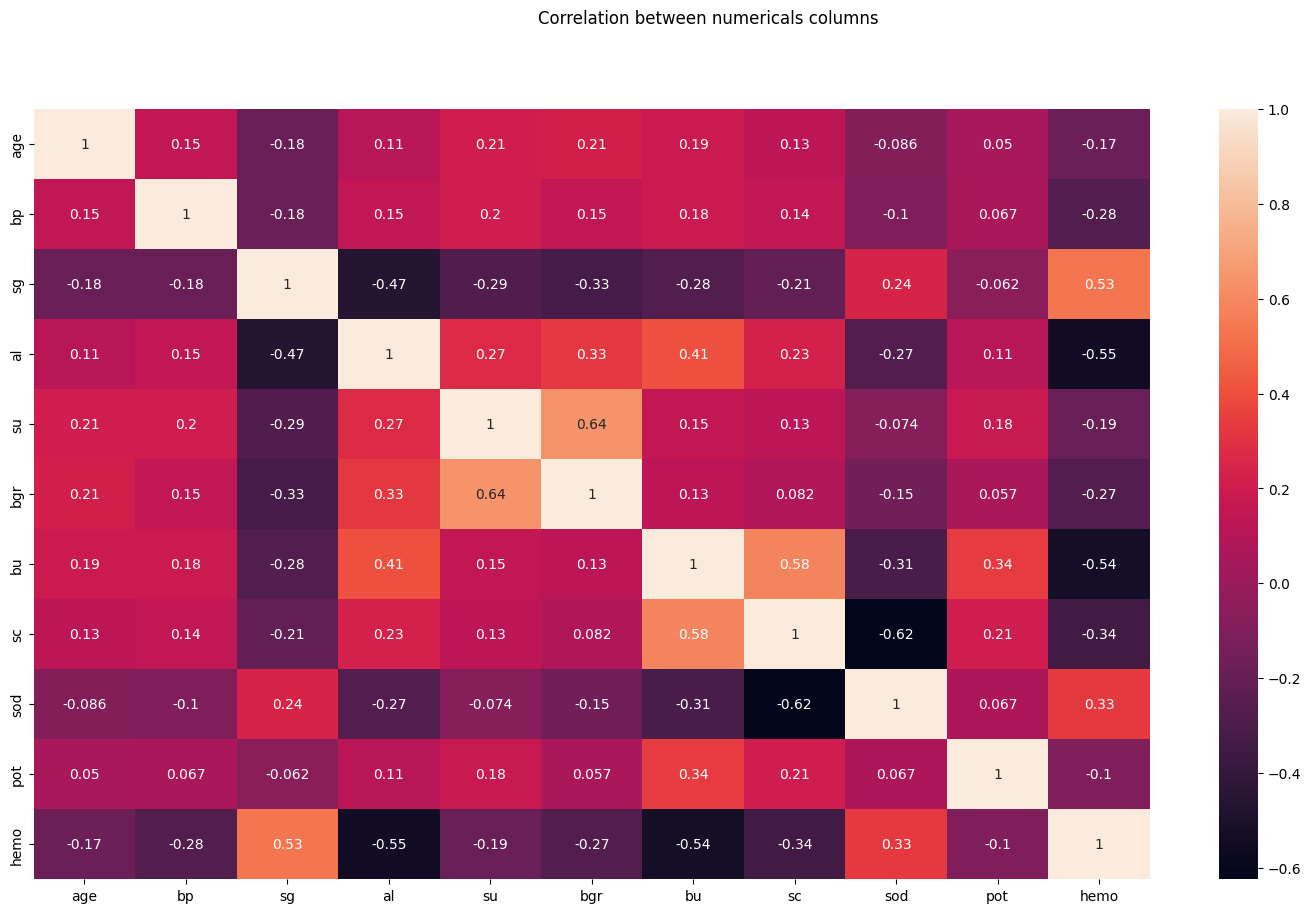

In [306]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num].corr(),annot=True)
plt.suptitle("Correlation between numericals columns")
plt.show()

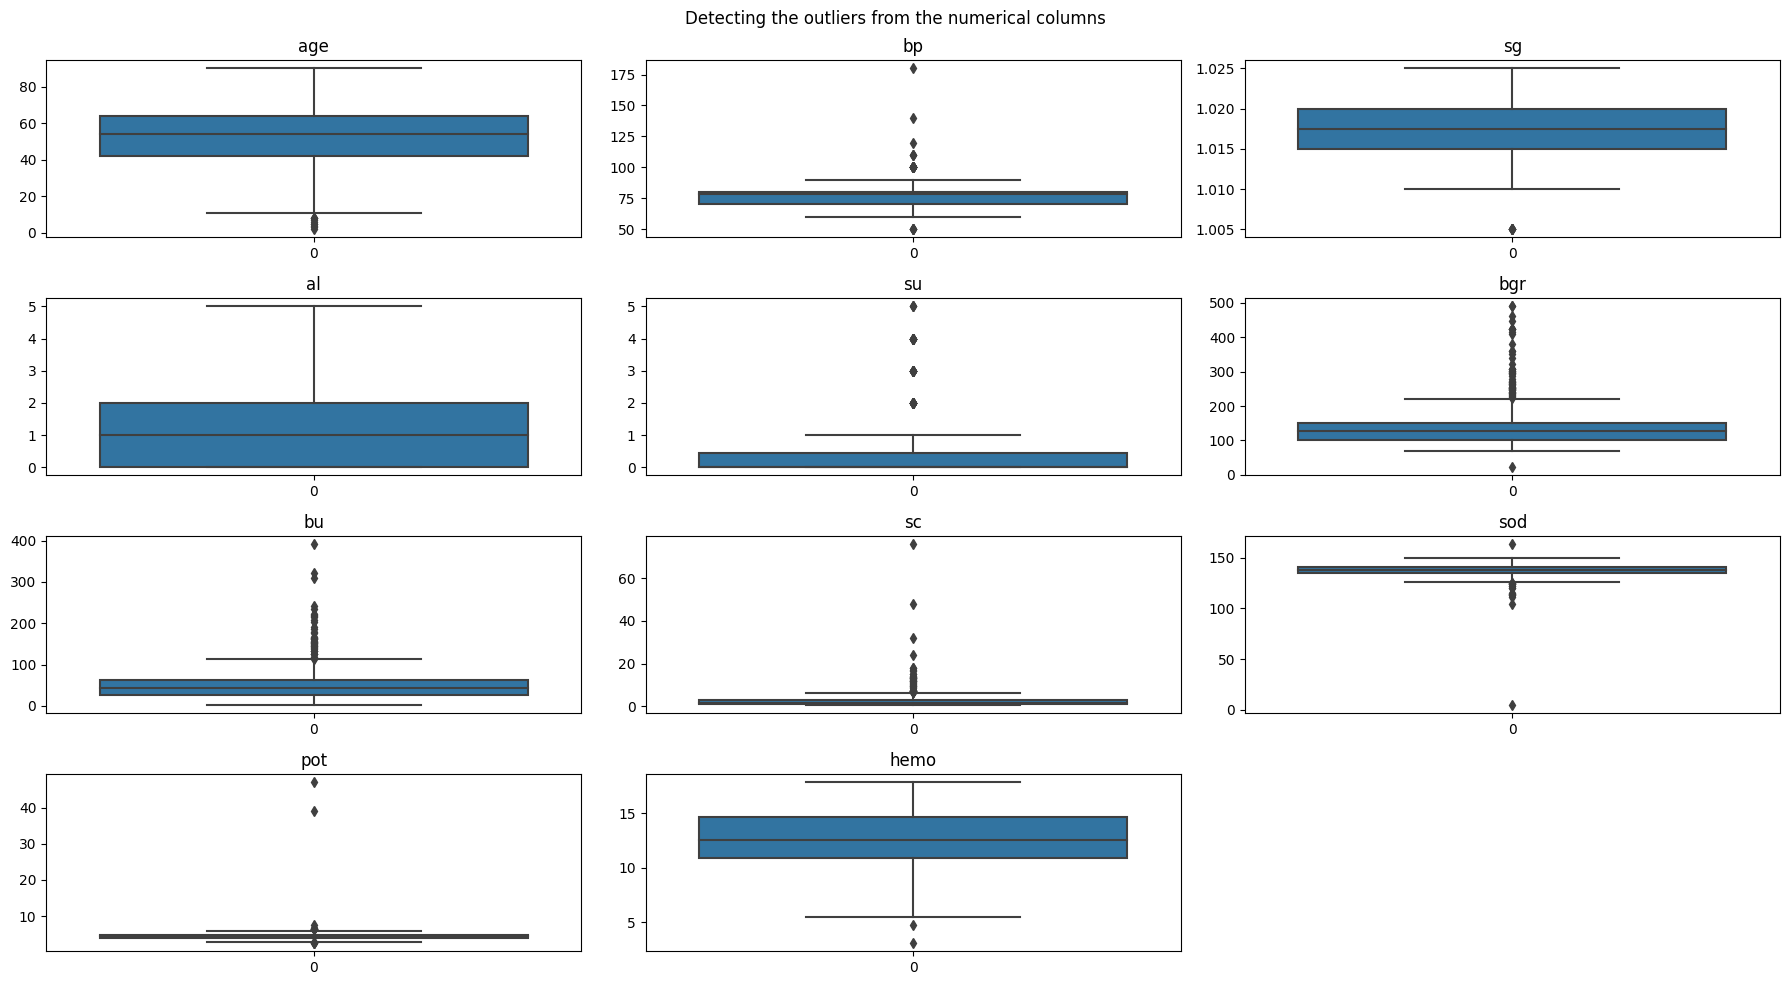

In [307]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[v])
    plt.title(v)
plt.suptitle("Detecting the outliers from the numerical columns")
plt.tight_layout()
plt.show()

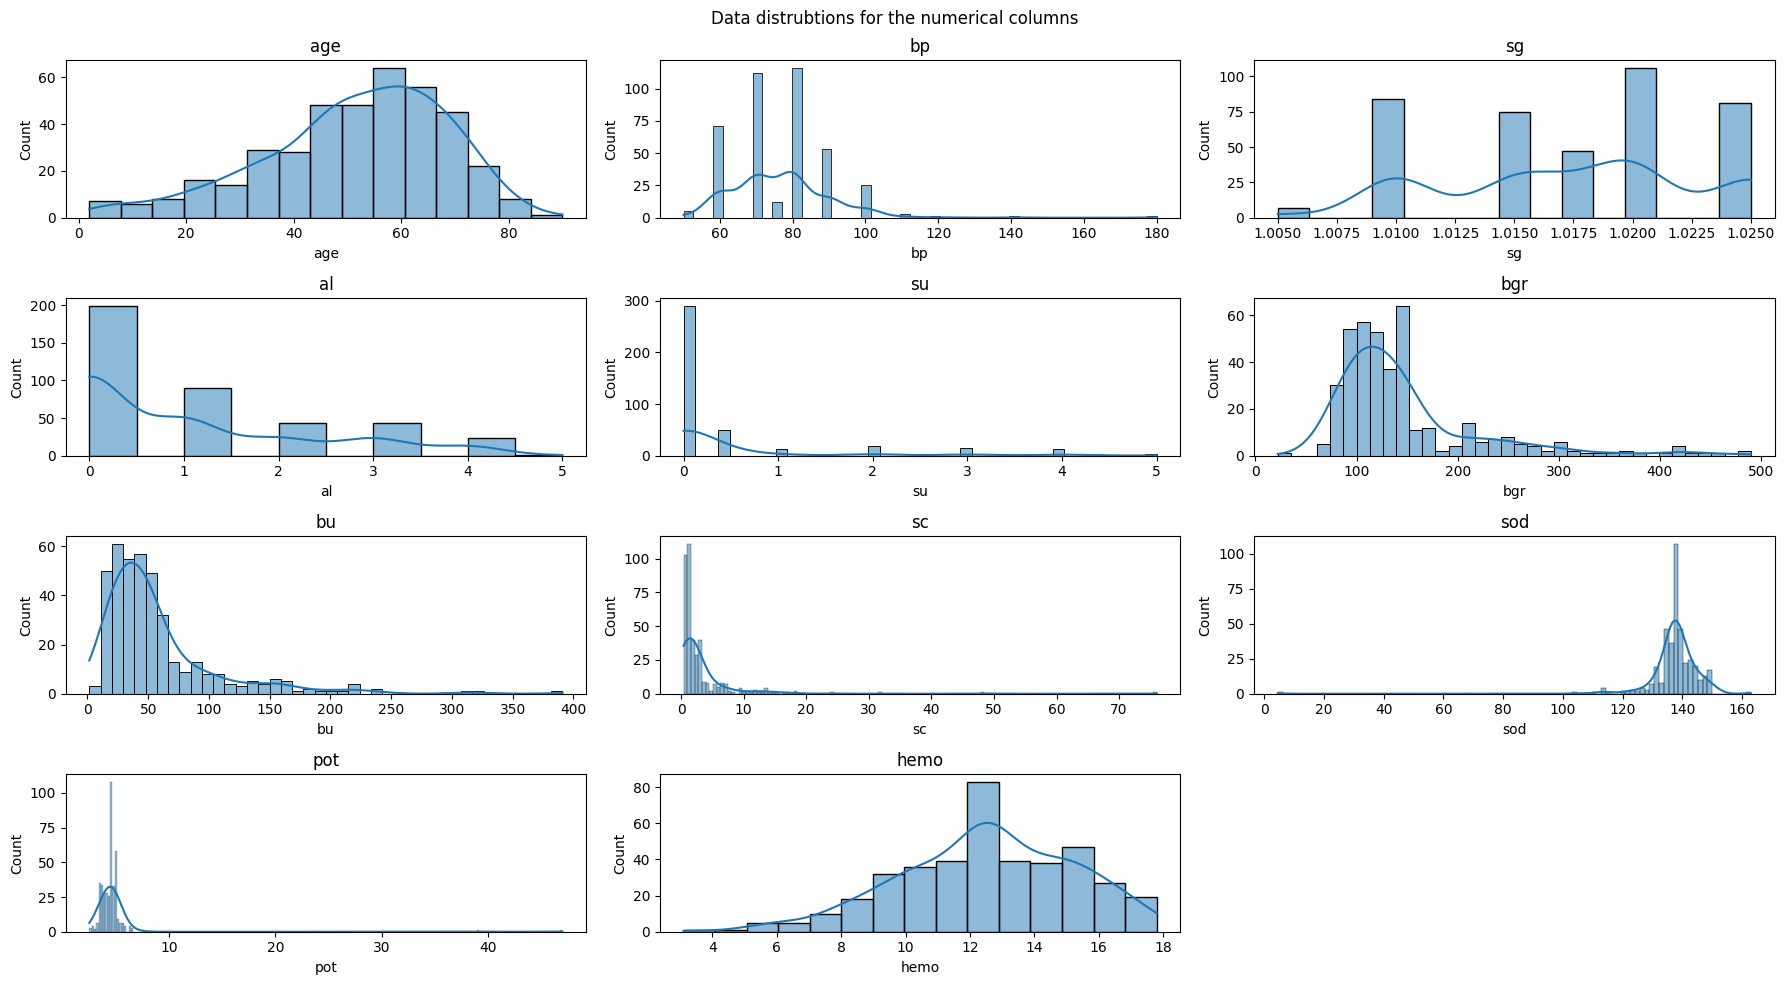

In [308]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[v],kde=True)
    plt.title(v)
plt.suptitle("Data distrubtions for the numerical columns")
plt.tight_layout()
plt.show()

In [309]:
# plt.figure(figsize=(20,10)
# sns.pairplot(df)

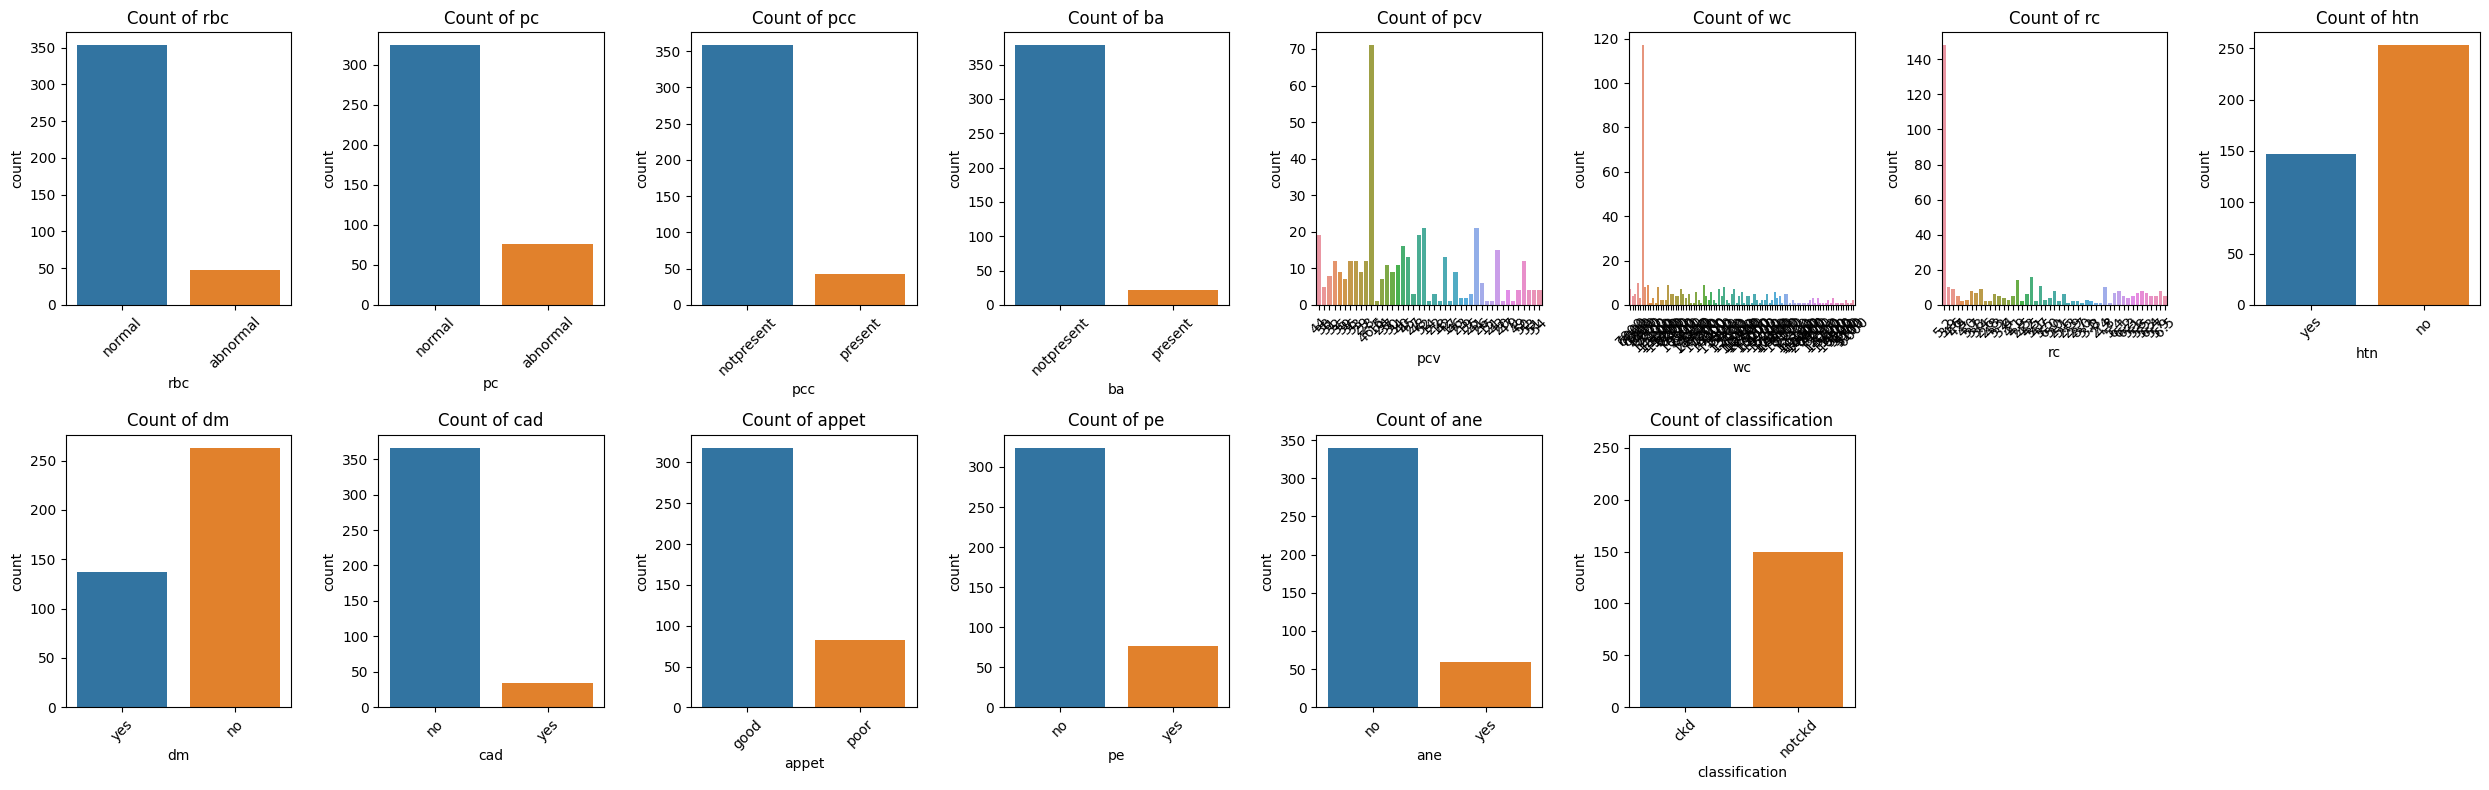

In [310]:
num_plots = len(cat)
rows = (num_plots + 7) // 8  # Calculate the number of rows needed

plt.figure(figsize=(25, rows * 4))  # Adjust the figure size based on the number of rows

for i, col in enumerate(cat, start=1):
    plt.subplot(rows, 8, i)  # Adjust the subplot position
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### **3. Data Splitting**

In [311]:
df.to_csv("Chronic_kidney_disease(clean_ds).csv")

In [312]:
from sklearn.model_selection import train_test_split,GridSearchCV
##preprocessing libraries from sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
## model train libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
##import the pipeline
from sklearn.pipeline import Pipeline
## importing the columnstransformer
from sklearn.compose import ColumnTransformer
##importing the model evaluations
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_curve

In [313]:
new_df=df.copy()

In [314]:
X=new_df.drop(columns='classification')
y=new_df['classification']

In [315]:
le=LabelEncoder()

In [316]:
y=le.fit_transform(y)

In [317]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [318]:
print("X_train shape:- ",X_train.shape," X_test shape:- ",X_test.shape," y_train shape:- ",y_train.shape," y_test shape:- ",y_test.shape)

X_train shape:-  (320, 24)  X_test shape:-  (80, 24)  y_train shape:-  (320,)  y_test shape:-  (80,)


#### **M-1**

In [319]:
lgr=LogisticRegression()

In [320]:
cat_i

[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [321]:
onh = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
stc=StandardScaler()

tf1=ColumnTransformer([
    ('onh',onh,[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
],remainder='passthrough')


tf2=ColumnTransformer([
    ('stc',stc,slice(0,None)),
],remainder='passthrough')

In [322]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lgr',lgr),
])

In [323]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lgr', LogisticRegression())])

In [324]:
y_pred_lgr=pipe_lgr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [325]:
score_lgr=accuracy_score(y_test,y_pred_lgr)
print("Score of Logistic Regression:- ",score_lgr)

Score of Logistic Regression:-  0.9875


In [326]:
score_train=pipe_lgr.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [327]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



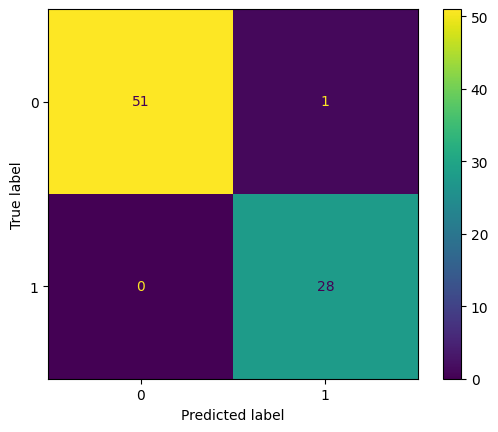

In [328]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

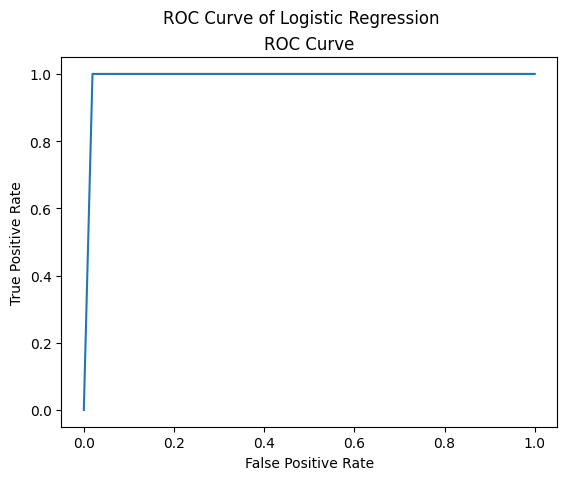

In [329]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgr)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Logistic Regression")
plt.show()

### M-2

In [330]:
knn=KNeighborsClassifier(n_neighbors=10)

In [331]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [332]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [333]:
y_pred_knn=pipe_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [334]:
score_knn=accuracy_score(y_test,y_pred_knn)
print("Score of knn:- ",score_knn)

Score of knn:-  0.875


In [335]:
score_train=pipe_knn.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  0.875


In [336]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        52
           1       1.00      0.64      0.78        28

    accuracy                           0.88        80
   macro avg       0.92      0.82      0.85        80
weighted avg       0.90      0.88      0.87        80



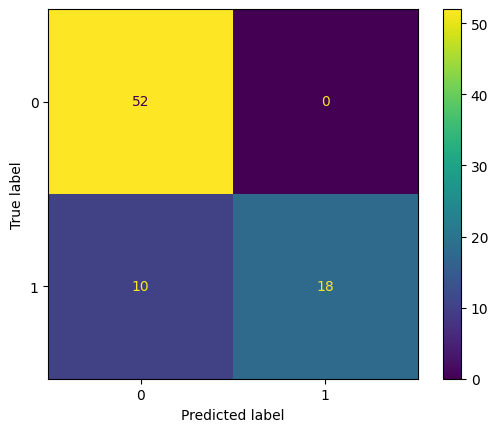

In [337]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

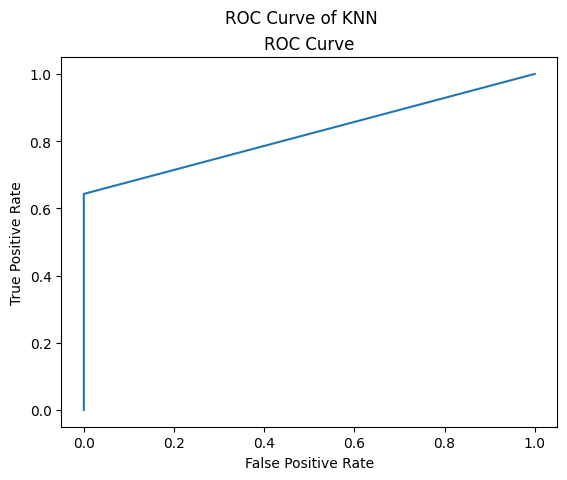

In [338]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of KNN")
plt.show()

### **M-3**

In [339]:
svc=SVC()

In [340]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [341]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [342]:
y_pred_svc=pipe_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [343]:
score_svc=accuracy_score(y_test,y_pred_svc)
print("Score of svc:- ",score_svc)

Score of svc:-  0.925


In [344]:
score_train=pipe_svc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  0.990625


In [345]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



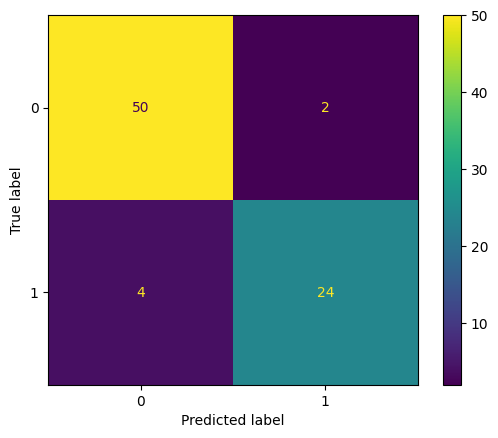

In [346]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

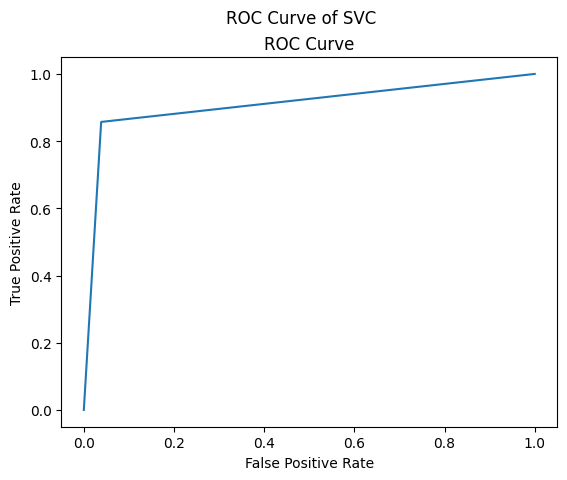

In [347]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of SVC")
plt.show()

### **M-4**

In [427]:
dtc=DecisionTreeClassifier()
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [428]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [429]:
y_pred_dtc=pipe_dtc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [430]:
score_dtc=accuracy_score(y_test,y_pred_dtc)
print("Score of Decision tree:- ",score_dtc)

Score of Decision tree:-  1.0


In [431]:
score_train=pipe_dtc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [432]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



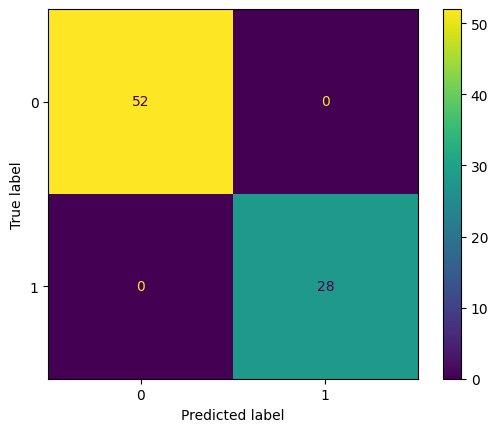

In [433]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

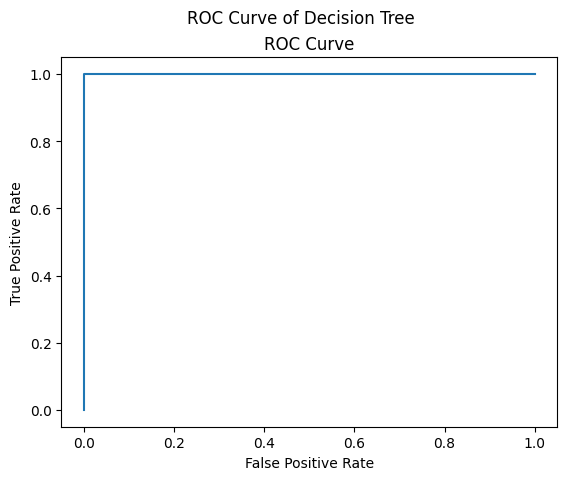

In [434]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Decision Tree")
plt.show()

### **M-5**

In [419]:
rfc=RandomForestClassifier()
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rfc',rfc)
])

In [420]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rfc', RandomForestClassifier())])

In [421]:
y_pred_rfc=pipe_rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [422]:
score_rfc=accuracy_score(y_test,y_pred_rfc)
print("Score of Random forest(Testing dataset):- ",score_rfc)

Score of Random forest(Testing dataset):-  1.0


In [423]:
score_train=pipe_rfc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [424]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



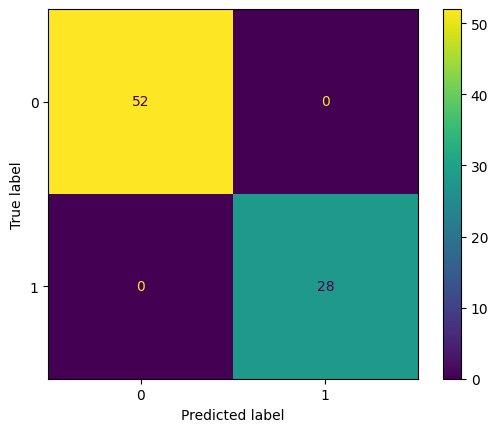

In [425]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

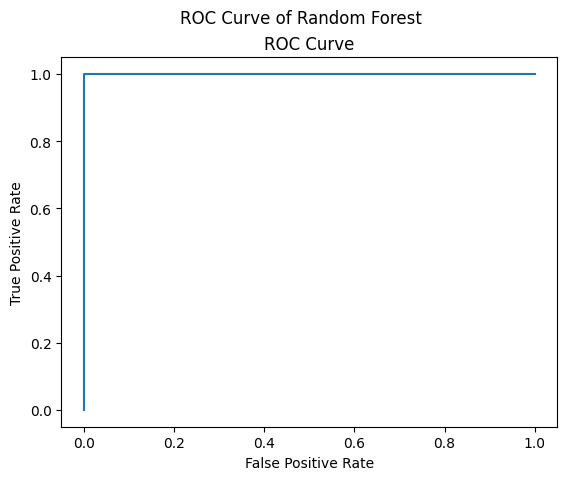

In [426]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Random Forest")
plt.show()

### **M-6**

In [435]:
bgg=BaggingClassifier(estimator=rfc)

pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('bgg',bgg)
])

In [436]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('bgg', BaggingClassifier(estimator=RandomForestClassifier()))])

In [437]:
y_pred_bgg=pipe_bgg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [438]:
score_bgg=accuracy_score(y_test,y_pred_bgg)
print("Score of Bagging with Random Forest:- ",score_bgg)

Score of Bagging with Random Forest:-  0.9875


In [439]:
score_train=pipe_bgg.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [440]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



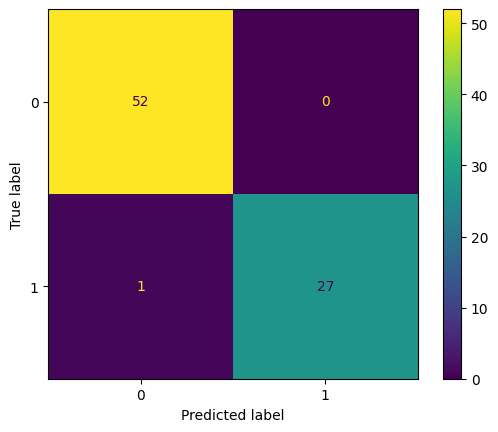

In [370]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

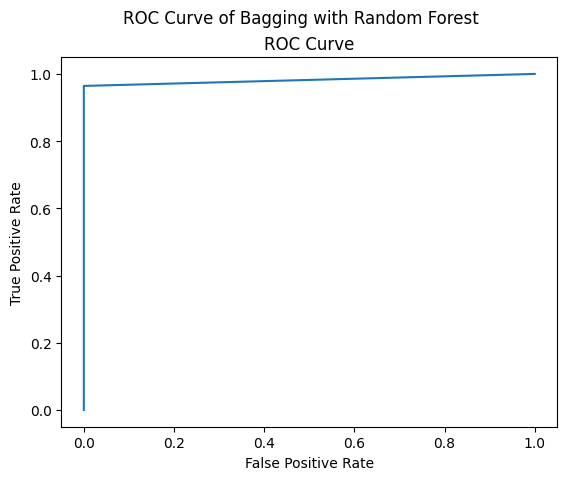

In [371]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bgg)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Bagging with Random Forest")
plt.show()

### **M-7**

In [372]:
ada=AdaBoostClassifier()
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('ada',ada)
])

In [373]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('ada', AdaBoostClassifier())])

In [374]:
y_pred_ada=pipe_ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [375]:
score_ada=accuracy_score(y_test,y_pred_ada)
print("Score of AdaBoosting Classifier(Testing score):- ",score_ada)

Score of AdaBoosting Classifier(Testing score):-  0.9875


In [376]:
score_train=pipe_ada.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [377]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



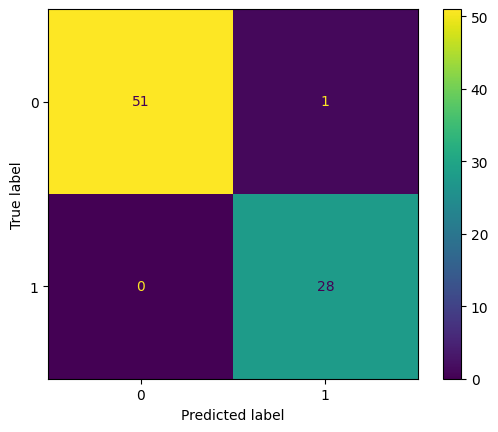

In [378]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

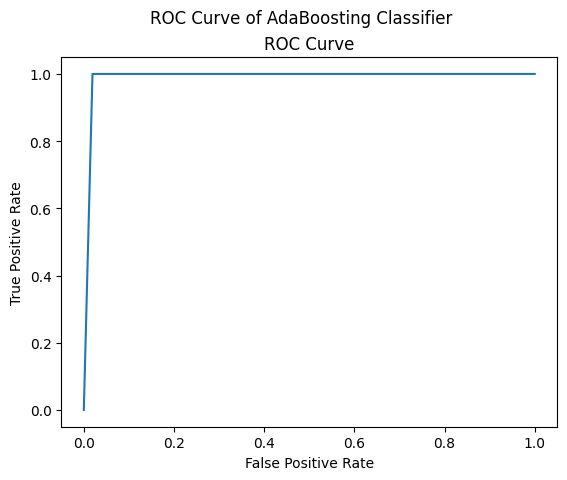

In [379]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of AdaBoosting Classifier")
plt.show()

### **M-8**

In [380]:
grd_en=GradientBoostingClassifier()

pipe_grd_en=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('grd_en',grd_en)
])

In [381]:
pipe_grd_en.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('grd_en', GradientBoostingClassifier())])

In [382]:
y_pred_grd_en=pipe_grd_en.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [383]:
score_grd=accuracy_score(y_test,y_pred_grd_en)
print("Score of Gradient BoostingClassifier:- ",score_grd)

Score of Gradient BoostingClassifier:-  0.9875


In [384]:
score_train=pipe_grd_en.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


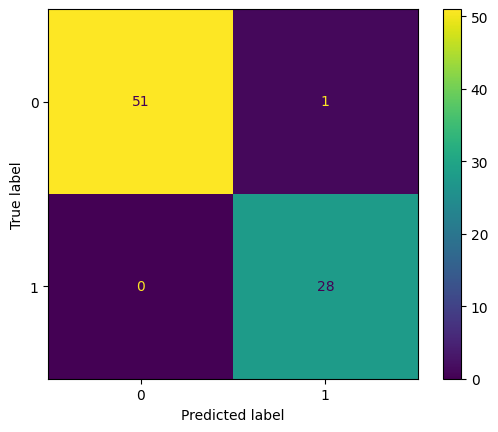

In [385]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_grd_en)).plot()

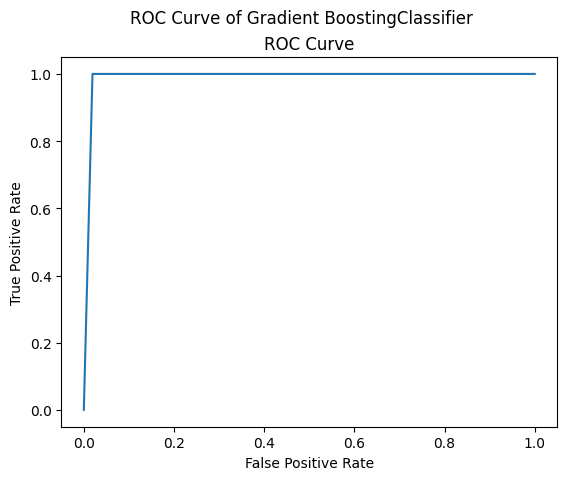

In [386]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grd_en)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Gradient BoostingClassifier")
plt.show()

### **M-9**

In [387]:
xgb=XGBClassifier()

pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgb',xgb)
])

In [388]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgb',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [389]:
y_pred_xgb=pipe_xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [390]:
score_xgb=accuracy_score(y_test,y_pred_xgb)
print("Score of XGBoosting classifier:- ",score_xgb)

Score of XGBoosting classifier:-  0.9875


In [391]:
score_train=pipe_xgb.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  1.0


In [392]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



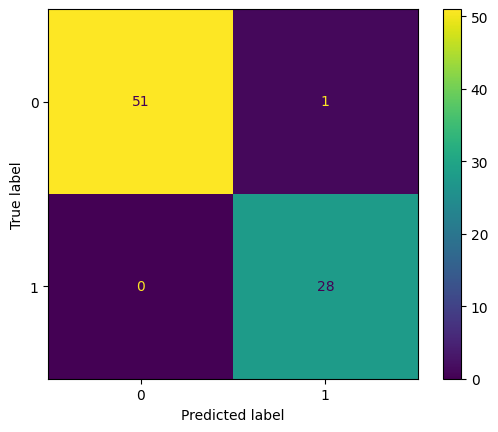

In [393]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

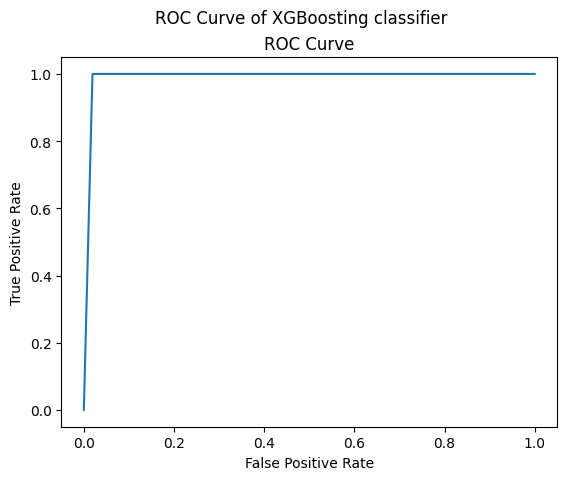

In [394]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of XGBoosting classifier")
plt.show()

In [442]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier'],
    'Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb]
}

In [443]:
pd.DataFrame(s)

,Model Name,Score
0,Logistic Regression,0.9875
1,KNN,0.8750
2,SVC,0.9250
3,Decision Tree,1.0000
4,Random Forest,1.0000
5,Bagging classifier,0.9875
6,AdaBoosting Classifier,0.9875
7,Gradient_Boosting classifier,0.9875
8,XGBoosting classifier,0.9875


#### **ANN-Implementation**

In [397]:
X_train_onh=onh.fit_transform(X_train)
X_test_onh=onh.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 9, 10, 11, 13, 14, 15, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [398]:
X_train_scaled=stc.fit_transform(X_train_onh)
X_test_scaled=stc.transform(X_test_onh)

In [399]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [446]:
##model init
model=Sequential()

##model creating
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [447]:
##model compiling
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [448]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test),batch_size=64)

Epoch 1/50
5/5 [==============================] - 3s 114ms/step - loss: 0.9733 - accuracy: 0.5219 - val_loss: 0.7201 - val_accuracy: 0.5375
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.8744 - accuracy: 0.5656 - val_loss: 0.6359 - val_accuracy: 0.6625
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.6695 - accuracy: 0.6687 - val_loss: 0.5790 - val_accuracy: 0.7250
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.7090 - accuracy: 0.6625 - val_loss: 0.5307 - val_accuracy: 0.8250
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5143 - accuracy: 0.7437 - val_loss: 0.4938 - val_accuracy: 0.9250
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.4580 - accuracy: 0.7781 - val_loss: 0.4638 - val_accuracy: 0.9125
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 0.4305 - accuracy: 0.8000 - val_loss: 0.4363 - val_accuracy: 0.9375
Epoch 8/50
5/5 [==========

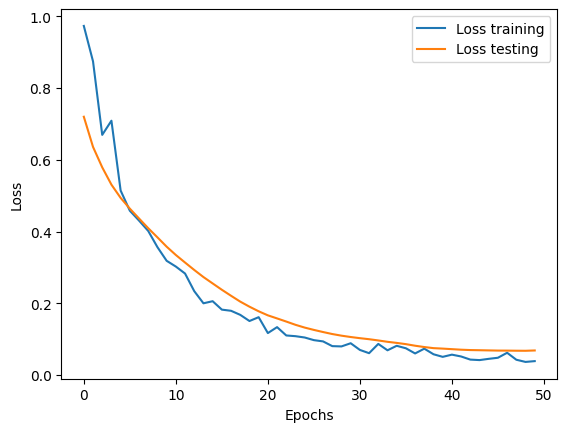

In [449]:
plt.plot(history.history['loss'],label='Loss training')
plt.plot(history.history['val_loss'],label='Loss testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

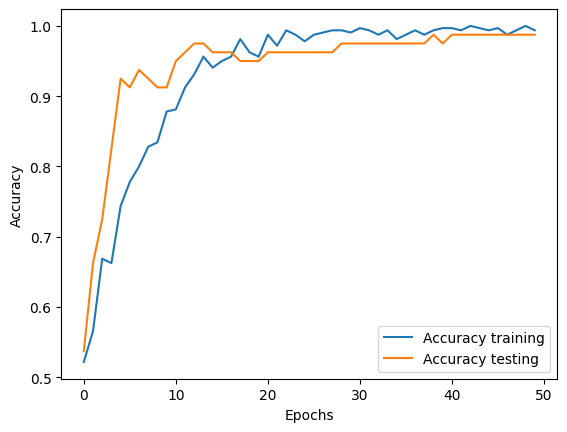

In [450]:
plt.plot(history.history['accuracy'],label='Accuracy training')
plt.plot(history.history['val_accuracy'],label='Accuracy testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [405]:
y_pred_ann=model.predict(X_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [406]:
threshold=0.5

y_pred_ann=(y_pred_ann >= threshold).astype(int)

In [407]:
score_ann=accuracy_score(y_test,y_pred_ann)
print("Score of ANN(Testing):- ",score_ann)

Score of ANN(Testing):-  0.95


In [408]:
score_train=model.evaluate(X_train_scaled,y_train)
print("Score on Training dataset:- ",score_train[1])

10/10 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Score on Training dataset:-  1.0


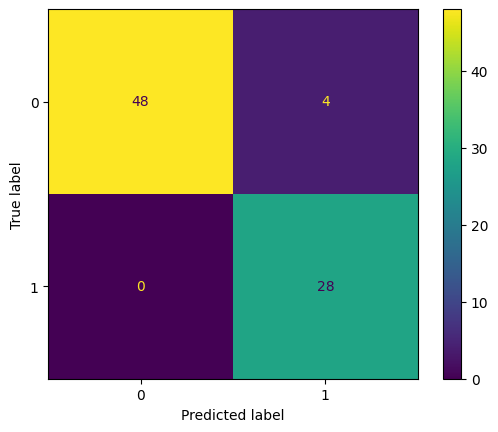

In [409]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

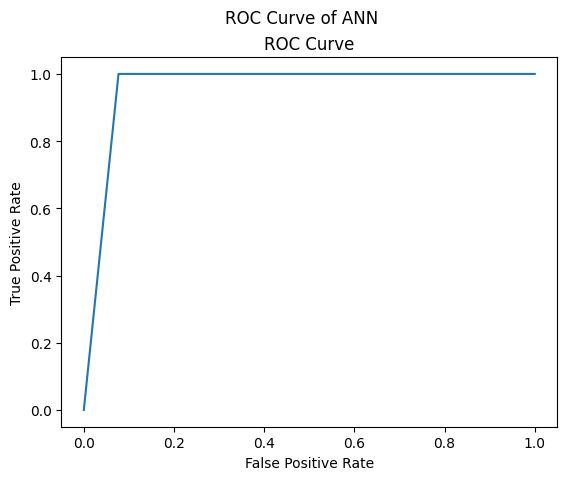

In [410]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of ANN")
plt.show()

In [451]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
    'Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann]
}

In [452]:
pd.DataFrame(s)

,Model Name,Score
0,Logistic Regression,0.9875
1,KNN,0.8750
2,SVC,0.9250
3,Decision Tree,1.0000
4,Random Forest,1.0000
5,Bagging classifier,0.9875
6,AdaBoosting Classifier,0.9875
7,Gradient_Boosting classifier,0.9875
8,XGBoosting classifier,0.9875
9,ANN,0.9500
